# Домашнее задание №2

Задание присылать на почту **aleksartmonov@gmail.com** в форматах *.ipynb* и отрендеренный результат в *.html*

В теме письма указать **AU2018 HW2 <Фамилия Имя>**

soft deadline: 04.03.2018T23:59:00+0300

hard deadline: 11.03.2018T23:59:00+0300

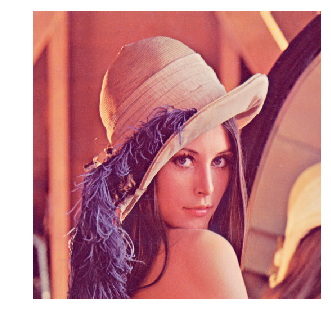

In [1]:
import cv2
import matplotlib.pylab as plt
%matplotlib inline

def show(img):
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

lena = cv2.imread("lena.jpg")
show(lena)

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15

**1. (6 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [3]:
from ipywidgets import interactive
import numpy as np

def f(c, γ):
    fig = plt.figure(figsize=(5, 15))
    ax1 = fig.add_subplot(3, 1, 1)
    x = np.linspace(0, 1, num=1000)
    ax1.plot(x, c * x ** γ)
    ax1.set_ylim(0, 1)
    ax1.set_title('Gamma correction')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)
    ax2 = fig.add_subplot(3, 1, 2)
    ax2.set_axis_off()
    ax2.imshow(lena_gray_cvt, cmap='gray')

    lena_gamma = (255 * c * (lena_gray_cvt.astype(float) / 255) ** γ).astype('uint8')
    ax3 = fig.add_subplot(3, 1, 3)
    ax3.set_axis_off()
    ax3.imshow(lena_gamma, cmap='gray')
    
    
interactive_plot = interactive(f, c=(0., 2.), γ=(0., 4.4))
output = interactive_plot.children[-1]
output.layout.height = '900px'

interactive_plot

interactive(children=(FloatSlider(value=1.0, description='c', max=2.0), FloatSlider(value=2.2, description='γ', max=4.4), Output(layout=Layout(height='900px'))), _dom_classes=('widget-interact',))

**2. (3 балла)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

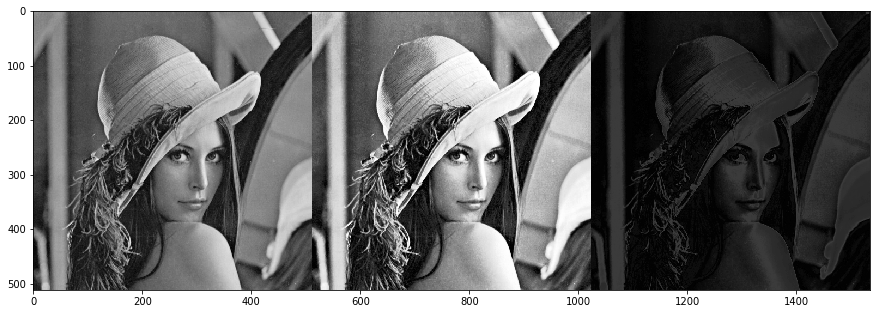

In [4]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)

lena_norm = np.zeros_like(lena_gray_cvt, dtype=float)
lena_norm = cv2.normalize(lena_gray_cvt, lena_norm, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
lena_norm = (255 * lena_norm).astype('uint8')

lena_eq = cv2.equalizeHist(lena_gray_cvt)

lena_diff = np.abs(lena_norm.astype(int) - lena_eq.astype(int)).astype('uint8')

collage = np.concatenate((lena_norm, lena_eq, lena_diff), axis=1)

plt.imshow(collage, cmap='gray')

**3. (3 балла) ** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

In [5]:
def salt_pepper(src, p, q=None):
    if q is None:
        q = p
    
    prob = np.random.rand(*src.shape)
    tgt = src.copy()
    tgt[prob < p] = 0
    tgt[(prob >= p) * (prob < q + p)] = 255
    return tgt

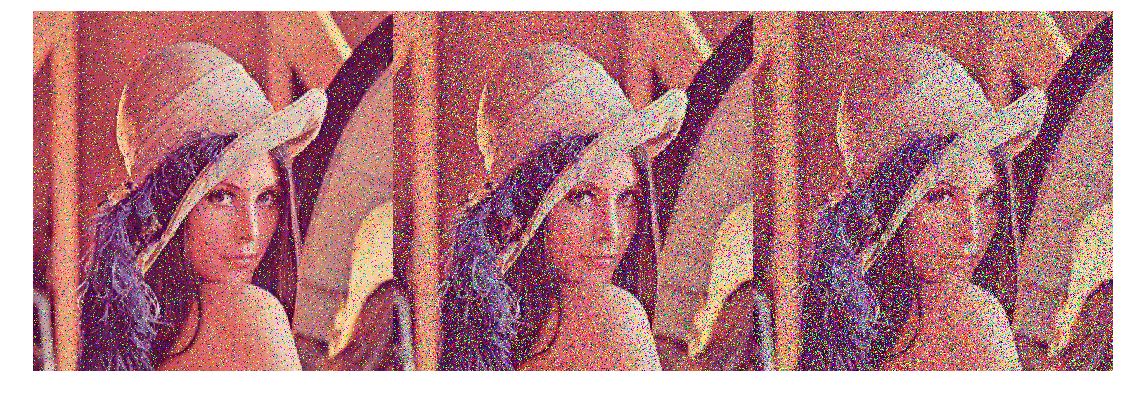

In [6]:
lena_noise_1 = np.transpose(np.array([salt_pepper(src, 0.05) for src in cv2.split(lena)]), (1, 2, 0))
lena_noise_2 = np.transpose(np.array([salt_pepper(src, 0.1) for src in cv2.split(lena)]), (1, 2, 0))
lena_noise_3 = np.transpose(np.array([salt_pepper(src, 0.15) for src in cv2.split(lena)]), (1, 2, 0))

collage_noise = np.concatenate((lena_noise_1, lena_noise_2, lena_noise_3), axis=1)

show(collage_noise)

**5. (6 баллов)** Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со  значениями радиуса фильтров, которые будут задаваться с помощью слайдера, как в задании **1**.

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. Итого для каждого $D$ должно рисоваться 8 картинок. 

In [7]:
def f(D):
    f = np.fft.fft2(lena_gray_cvt)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
        
    filter_low = fshift.copy()
    filter_low[magnitude_spectrum > D] = 0
    
    filter_high = fshift.copy()
    filter_high[magnitude_spectrum < D] = 0
    
    lena_low = np.abs(np.fft.ifft2(np.fft.ifftshift(filter_low)))
    lena_high = np.abs(np.fft.ifft2(np.fft.ifftshift(filter_high)))
    
    magn_low = 20 * np.log(np.abs(filter_low + 1))
    magn_high = 20 * np.log(np.abs(filter_high + 1))
    
    fig = plt.figure(figsize=(16, 8))
    
    ax11 = fig.add_subplot(2, 4, 1); ax11.set_axis_off()
    ax11.set_title('orig img'), ax11.imshow(lena_gray_cvt, cmap='gray')
    
    ax21 = fig.add_subplot(2, 4, 5); ax21.set_axis_off()
    ax21.set_title('orig img'), ax21.imshow(lena_gray_cvt, cmap='gray')
    
    ax12 = fig.add_subplot(2, 4, 2); ax12.set_axis_off()
    ax12.set_title('orig spec'), ax12.imshow(magnitude_spectrum, cmap='gray')
    
    ax22 = fig.add_subplot(2, 4, 6); ax22.set_axis_off()
    ax22.set_title('orig spec'), ax22.imshow(magnitude_spectrum, cmap='gray')
    
    ax13 = fig.add_subplot(2, 4, 3); ax13.set_axis_off()
    ax13.set_title('low spec'), ax13.imshow(magn_low, cmap='gray')
    
    ax23 = fig.add_subplot(2, 4, 7); ax23.set_axis_off()
    ax23.set_title('high spec'), ax23.imshow(magn_high, cmap='gray')
    
    ax14 = fig.add_subplot(2, 4, 4); ax14.set_axis_off()
    ax14.set_title('low img'), ax14.imshow(lena_low, cmap='gray')
    
    ax24 = fig.add_subplot(2, 4, 8); ax24.set_axis_off()
    ax24.set_title('high img'), ax24.imshow(lena_high, cmap='gray')
    
    
interactive_plot = interactive(f, D=(20, 350))
output = interactive_plot.children[-1]

interactive_plot

interactive(children=(IntSlider(value=185, description='D', max=350, min=20), Output()), _dom_classes=('widget-interact',))

**6. (5 баллов) **Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

In [8]:
def mse(orig, res):
    return np.mean((orig.astype(float) - res.astype(float)) ** 2)

In [9]:
img = cv2.imread("lena_diagonal.jpg")[:, :, 0]
orig = cv2.imread("lena_gray_512.tif")[:, :, 0]

In [10]:
n = img.shape[0]
w = 3
dist = int(n / 7)

In [11]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20*np.log(np.abs(fshift))

value2comp = np.abs(fshift)[int(n/2), int(n/2)] * 0.001

fshift_ = fshift.copy()
fshift_abs = np.abs(fshift_)

to_cut = []

for i in range(n):
    for j in range(n):
        if fshift_abs[i, j] >= value2comp and np.sqrt((i - n/2) ** 2 + (j - n/2) ** 2) > dist:
            for k in range(-w, w + 1):
                for l in range(-w, w + 1):
                    to_cut.append((i + k, j + l))
                    
for i, j in to_cut:
    if i >= 0 and i < n and j >= 0 and j < n:
        fshift_[i, j] = 0
    
res = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_)))
res *= orig.mean() / res.mean()

magn_ = 20 * np.log(np.abs(fshift_ + 1))

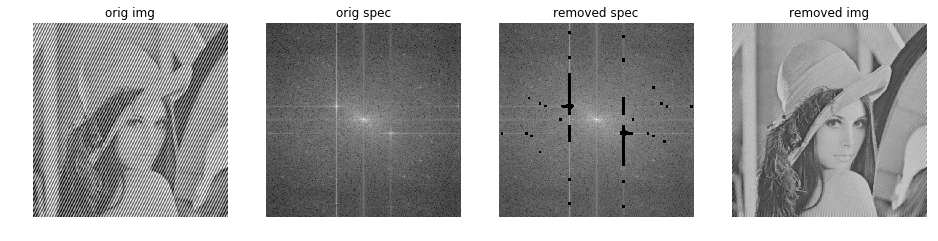

In [12]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_axis_off()
ax1.set_title('orig img')
ax1.imshow(img, cmap='gray')

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_axis_off()
ax2.set_title('orig spec')
ax2.imshow(magnitude_spectrum, cmap='gray')

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_axis_off()
ax3.set_title('removed spec')
ax3.imshow(magn_, cmap='gray')

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_axis_off()
ax4.set_title('removed img')
ax4.imshow(res, cmap='gray')

In [13]:
mse(orig, res)

728.2469173273251

**7. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

In [14]:
img = cv2.imread("lena_color_512-noise.tif")[:, :, ::-1]
orig = cv2.imread("lena_color_512.tif")[:, :, ::-1]

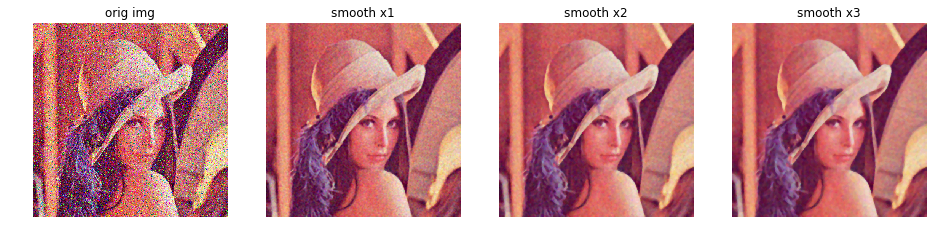

In [15]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_axis_off()
ax1.set_title('orig img')
ax1.imshow(img)

kernel = 5
res = cv2.medianBlur(img, kernel)

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_axis_off()
ax2.set_title('smooth x1')
ax2.imshow(res)

res = cv2.medianBlur(res, kernel)

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_axis_off()
ax3.set_title('smooth x2')
ax3.imshow(res)

res = cv2.medianBlur(res, kernel)

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_axis_off()
ax4.set_title('smooth x3')
ax4.imshow(res)

In [16]:
np.mean((res - orig.astype(float)) ** 2)

137.07026163736978

**8. (5 баллов)** Реализуйте функцию пространственной фильтрации изображения однородным усредняющим фильтром размера $n \times n$ (все коэффициенты маски равны $\frac{1}{n^2}$). При вычислении среднего используйте тот факт, что при переходе от точки к точке обновляется только часть элементов изображения под маской. Примените реализованный фильтр к предварительно переведенному в градации серого изображению $lena.jpg$ при $n = 3$ и $n = 5$. Постройте и сохраните изображение, представляющее собой разность полученных результатов фильтрации.

In [17]:
def filt(src, kernel_size):
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size ** 2)
    n = int((kernel_size - 1) / 2)
    tmp = np.zeros((src.shape[0] + n * 2, src.shape[1] + n * 2))
    tmp[n:-n, n:-n] = src
    tgt = np.zeros_like(src, dtype=float)
    
    for i in range(n, tgt.shape[0] - n - 1):
        for j in range(n, tgt.shape[1] - n - 1):
            tgt[i,j] = np.mean(np.sum(kernel * tmp[i-n:i+n+1, j-n:j+n+1]))
    
    return tgt

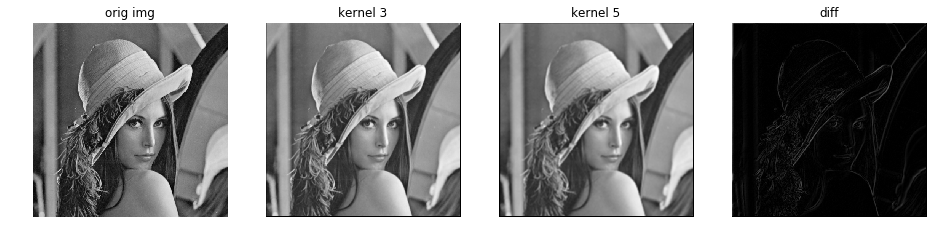

In [18]:
fig = plt.figure(figsize=(16, 4))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_axis_off()
ax1.set_title('orig img')
ax1.imshow(lena_gray_cvt, cmap='gray')

lena3 = filt(lena_gray_cvt, 3)

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_axis_off()
ax2.set_title('kernel 3')
ax2.imshow(lena3, cmap='gray')

lena5 = filt(lena_gray_cvt, 5)

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_axis_off()
ax3.set_title('kernel 5')
ax3.imshow(lena5, cmap='gray')

diff = np.abs(lena3 - lena5)

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_axis_off()
ax4.set_title('diff')
ax4.imshow(diff, cmap='gray')